In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import time
import statistics
import math

In [2]:
# get data
mouse_csv = '../../../05-Matplotlib/Instructions/Pymaceuticals/data/Mouse_metadata.csv'
study_csv = '../../../05-Matplotlib/Instructions/Pymaceuticals/data/Study_results.csv'
study_data = pd.read_csv(study_csv)
mouse_data = pd.read_csv(mouse_csv)

In [3]:
# inspect data
mouse_data.head
#mouse_data_all.shape

<bound method NDFrame.head of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]>

In [4]:
# inspect data
study_data.head
#study_data.shape

<bound method NDFrame.head of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]>

In [5]:
# combine mouse and study dataframes
all_data = pd.merge(mouse_data, study_data, on="Mouse ID")

In [6]:
# inspect merged data
all_data.head
#all_data.shape

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [7]:
# drop duplicates in mouse data
# result = one duplicated mouse
final_data = all_data.drop_duplicates()
final_data.shape

(1892, 8)

In [8]:
# find number of mice
mouse_count = len(final_data['Mouse ID'].unique())
mouse_count

249

In [9]:
# write to csv
#final_data.to_csv('final_data.csv')

In [10]:
# find unique drug regimens
unique_drug_regimens = final_data['Drug Regimen'].unique()
unique_drug_regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [11]:
# filter all data to make separate regimen dataframes
ramicane_data = final_data[final_data['Drug Regimen']=="Ramicane"]
capomulin_data = final_data[final_data['Drug Regimen']=="Capomulin"]
infubinol_data = final_data[final_data['Drug Regimen']=="Infubinol"]
ceftamin_data = final_data[final_data['Drug Regimen']=="Ceftamin"]
stelasyn_data = final_data[final_data['Drug Regimen']=="Stelasyn"]
zoniferol_data = final_data[final_data['Drug Regimen']=="Zoniferol"]
ketapril_data = final_data[final_data['Drug Regimen']=="Ketapril"]
propriva_data = final_data[final_data['Drug Regimen']=="Propriva"]
naftisol_data = final_data[final_data['Drug Regimen']=="Naftisol"]


In [12]:
## create some functions to extract mean tumor volumes:
# function to append volumes to a list
def collectMeanVols(dfIN, theDrug):
    meanVolPerTimePoint = []
    medianVolPerTimePoint = []
    varianceVolPerTimePoint = []
    stDevVolPerTimepoint = []
    semVolPerTimepoint = []
    allTimePoints = getTimePoints(dfIN)
    for timePoint in allTimePoints:
        theMean, theMedian, theVar, theStDev, theSEM = getVolume(dfIN, timePoint)
        meanVolPerTimePoint.append(theMean)
        medianVolPerTimePoint.append(theMedian)
        varianceVolPerTimePoint.append(theVar)
        stDevVolPerTimepoint.append(theStDev)
        semVolPerTimepoint.append(theSEM)
        #meanVolPerTimePoint.append(getVolume(df, timePoint))
    totalMean = statistics.mean(meanVolPerTimePoint)
    
    # I decided to assess drug efficacy using the last data point in time series
    dfOUT = pd.DataFrame(data={theDrug: [meanVolPerTimePoint[-1], medianVolPerTimePoint[-1], varianceVolPerTimePoint[-1], stDevVolPerTimepoint[-1], semVolPerTimepoint[-1]]})
    
    # also calculate number of mice used in study (i.e. number of unique mouse IDs)
    numberOfMice = len(dfIN['Mouse ID'].unique())
    
    # return variables
    return dfOUT, numberOfMice
 
# function to get unique time points:
def getTimePoints(df):
    timePoints = df.Timepoint.unique()
    return timePoints

# function to get mean volume per time point
def getVolume(df, timePoint):
    df = df[df['Timepoint']==timePoint]
    theMean = df['Tumor Volume (mm3)'].mean()
    theMedian = df['Tumor Volume (mm3)'].median()
    theVar = df['Tumor Volume (mm3)'].var()
    theStDev = df['Tumor Volume (mm3)'].std()
    theSEM = theStDev/math.sqrt(len(df.index))
    return theMean, theMedian, theVar, theStDev, theSEM


    

In [13]:
# run each drug regimen through my function to extract stats
ramicane_df, ramicaneMouseNumber = collectMeanVols(ramicane_data, unique_drug_regimens[0])
capomulin_df, capomulinMouseNumber = collectMeanVols(capomulin_data, unique_drug_regimens[1])
infubinol_df, infubinolMouseNumber = collectMeanVols(infubinol_data, unique_drug_regimens[2])
placebo_df, placeboMouseNumber = collectMeanVols(infubinol_data, unique_drug_regimens[3])
ceftamin_df, ceftaminMouseNumber = collectMeanVols(ceftamin_data, unique_drug_regimens[4])         
stelasyn_df, stelasynMouseNumber = collectMeanVols(stelasyn_data, unique_drug_regimens[5])         
zoniferol_df, zoniferolMouseNumber = collectMeanVols(zoniferol_data, unique_drug_regimens[6])         
ketapril_df, ketaprilMouseNumber = collectMeanVols(ketapril_data, unique_drug_regimens[7])          
propriva_df, proprivaMouseNumber = collectMeanVols(propriva_data, unique_drug_regimens[8])          
naftisol_df, naftisolMouseNumber = collectMeanVols(naftisol_data, unique_drug_regimens[9])       

unique_drug_regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [14]:
# concat all regimens into 1 df
drugRegimenStats=pd.concat([ramicane_df,capomulin_df,infubinol_df,placebo_df,ceftamin_df,stelasyn_df,zoniferol_df,ketapril_df,propriva_df,naftisol_df], axis=1)

In [15]:
# rename index to reflect stat types
drugRegimenStats.index = ['Mean Tumor Volume','Median Tumor Volume','Variance Tumor Volume','StDev Tumor Volume','StErr Tumor Volume']
drugRegimenStats

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
Mean Tumor Volume,34.955595,36.236114,65.755562,65.755562,64.132421,68.438310,65.960888,70.662958,66.258529,69.265506
Median Tumor Volume,34.848627,37.311846,66.083066,66.083066,64.299830,69.299149,65.684689,69.872251,64.957562,69.563621
Variance Tumor Volume,30.101010,31.460537,11.787426,11.787426,10.585242,27.340818,14.100301,23.229260,24.967290,26.079104
StDev Tumor Volume,5.486439,5.608969,3.433282,3.433282,3.253497,5.228845,3.755037,4.819674,4.996728,5.106770
StErr Tumor Volume,1.226805,1.223977,1.144427,1.144427,0.902358,1.576556,1.003576,1.453186,1.888586,1.416363


In [16]:
# collect mouse numbers
mouseNumberList = [ramicaneMouseNumber, capomulinMouseNumber, infubinolMouseNumber,placeboMouseNumber,ceftaminMouseNumber,stelasynMouseNumber,zoniferolMouseNumber,ketaprilMouseNumber,proprivaMouseNumber,naftisolMouseNumber]
mouseNumbers= pd.DataFrame(data={'MouseNumbers':mouseNumberList})
mouseNumbers.index = unique_drug_regimens
mouseNumbers

,MouseNumbers
Ramicane,25
Capomulin,25
Infubinol,25
Placebo,25
Ceftamin,25
Stelasyn,24
Zoniferol,25
Ketapril,25
Propriva,25
Naftisol,25


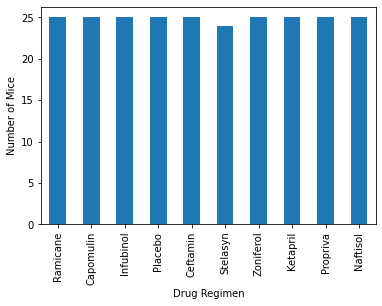

In [60]:
# plot number of mice with DataFrame.plt
ax=mouseNumbers.plot.bar(legend=False);
ax.set_xlabel('Drug Regimen');
ax.set_ylabel('Number of Mice');

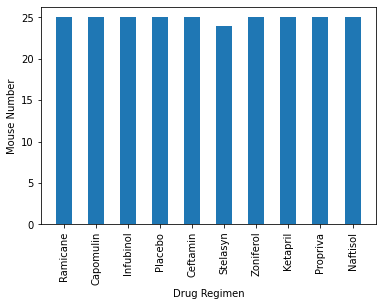

In [18]:
# plot number of mice with pyplot
plt.bar(x=unique_drug_regimens, height=mouseNumbers.MouseNumbers, width = 0.5);
plt.xticks(rotation=90);
plt.xlabel('Drug Regimen');
plt.ylabel('Mouse Number');

In [45]:
# find number of males and females used in study
# get rid of duplicate mouse IDs to reduce df to contain just a single instance of Mouse ID per mouse
uniqueMouseIDs = final_data.drop_duplicates(subset='Mouse ID', keep="first")

# check to see the number of rows in uniqueMouseIDs agrees with total number of mice used according to the bar charts
uniqueMouseIDs.shape 
# yes, they agree

# get number of females
numberFemales = uniqueMouseIDs.groupby(by='Sex').size().Female

# get number of males
numberMales = uniqueMouseIDs.groupby(by='Sex').size().Male

# turn into dataframe
sexOfMice = pd.DataFrame(data={'Sex':[numberFemales, numberMales]})
sexOfMice.index = ['Female', 'Male']
sexOfMice

,Sex
Female,124
Male,125


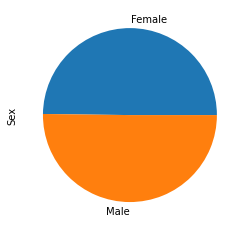

In [67]:
# plot male/female distribution as pie plot using Pandas
sexOfMice.plot.pie(subplots=True, legend=False);

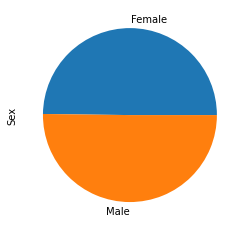

In [68]:
# plot male/female distribution as pie plot using pyplot
plt.pie(sexOfMice.Sex, labels = sexOfMice.index);
plt.ylabel('Sex');